## 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

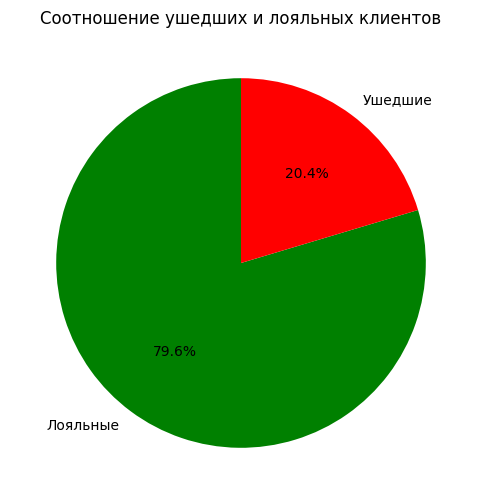

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

churn = pd.read_csv('data/churn.csv')


churn_counts = churn['Exited'].value_counts()
churn_labels = ['Лояльные', 'Ушедшие']

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Соотношение ушедших и лояльных клиентов')
plt.show()

Комментарий: <br>
Примерно 80% клиентов остались, а 20% ушли


## 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

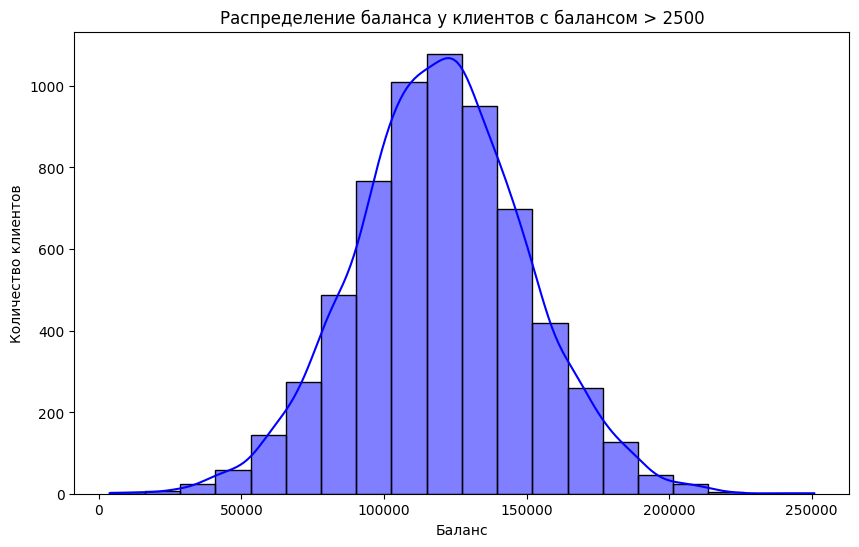

In [57]:
filtered = churn[churn['Balance'] > 2500]

plt.figure(figsize=(10, 6))
sns.histplot(filtered['Balance'], bins=20, kde=True, color='blue') # pyright: ignore[reportArgumentType]
plt.title('Распределение баланса у клиентов с балансом > 2500')
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов')
plt.show()

Комментарий: <br> Пик в районе 130_000, что нормально

## 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

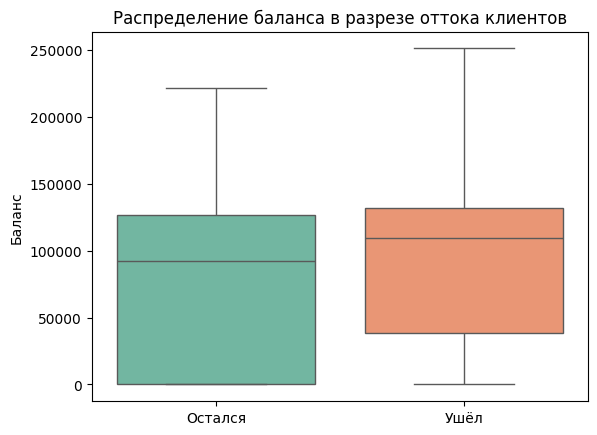

In [58]:
sns.boxplot(
    x='Exited',
    y='Balance',
    data=churn,
    hue='Exited',
    palette='Set2'
    )

plt.title('Распределение баланса в разрезе оттока клиентов')
plt.xlabel('Exited (0 — остался, 1 — ушёл)')
plt.ylabel('Баланс')
plt.legend().remove()
plt.xticks([0, 1], ['Остался', 'Ушёл'])
plt.xlabel('')
plt.show()


Ушедшие имели высокие балансы, потеряли жирных клиентов в среднем

## 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

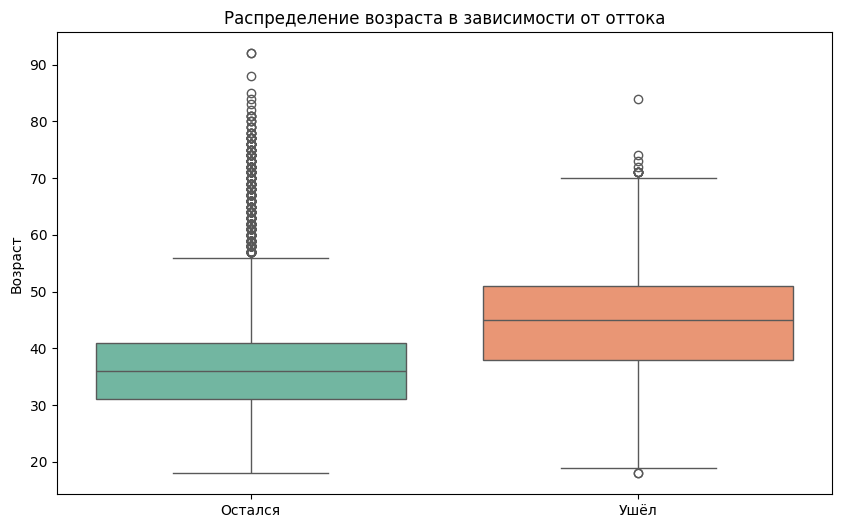

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Exited',
    y='Age',
    data=churn,
    hue='Exited',
    palette='Set2'
)
plt.title('Распределение возраста в зависимости от оттока')
plt.xlabel('')
plt.ylabel('Возраст')
plt.legend(title='Статус клиента', labels=['Остался', 'Ушёл']) 
plt.xticks([0, 1], ['Остался', 'Ушёл'])
plt.legend().remove()
plt.show()


Вывод: <br>
Ушедшие клиенты старше по возрасту. Cтоит сосредоточиться на возрасте 40+ как более уязвимом сегменте.


## 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

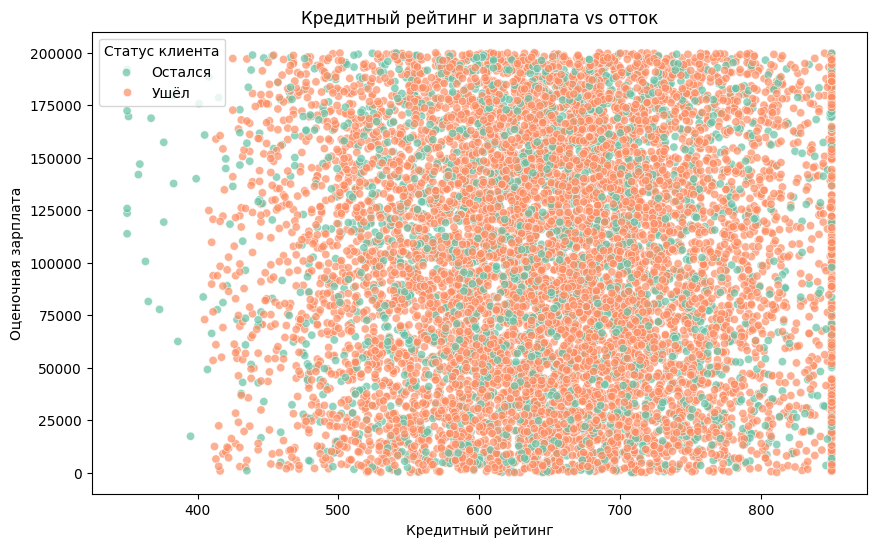

In [60]:
custom_palette = {0: '#fc8d62', 1: '#66c2a5'}

plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    data=churn,
    alpha=0.7,
    palette=custom_palette
    )

plt.title('Кредитный рейтинг и зарплата vs отток')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Оценочная зарплата')
plt.legend(title='Статус клиента', labels=['Остался', 'Ушёл']) 
plt.show()


Вывод: <br>
Явной зависимости между рейтингом и зарплатой нет. Отток встречается на всех уровнях зарплат и рейтингов.

## 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Подсказка
Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

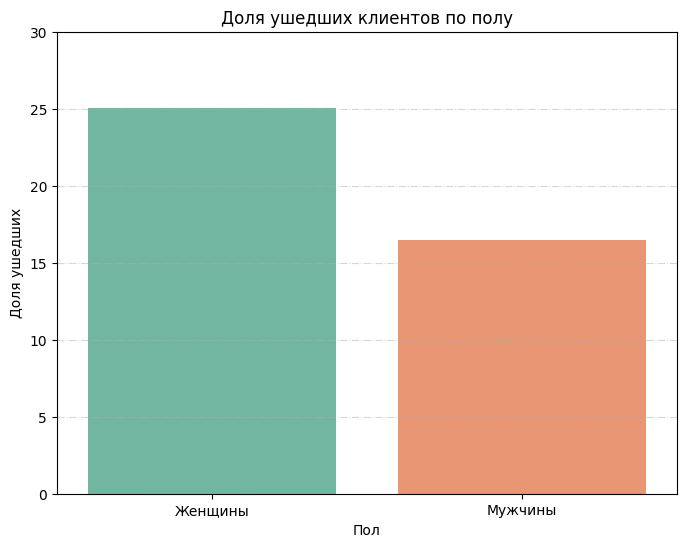

In [61]:
# Среднее по столбцу 'Exited' для каждой группы Gender
gender_churn = churn.groupby('Gender')['Exited'].mean().reset_index()
gender_churn['Exited'] = gender_churn['Exited'] * 100

plt.figure(figsize=(8, 6))
sns.barplot(
    x='Gender',
    y='Exited',
    data=gender_churn,
    hue='Gender',
    palette=['#66c2a5', '#fc8d62']
    )

plt.title('Доля ушедших клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Доля ушедших')
plt.ylim(0, 30)  # можно подстроить под масштаб
plt.grid(axis='y', linestyle='-.', alpha=0.5)
plt.xticks([0, 1], ['Женщины', 'Мужчины'])
plt.show()

Женщин больше уходит

## 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

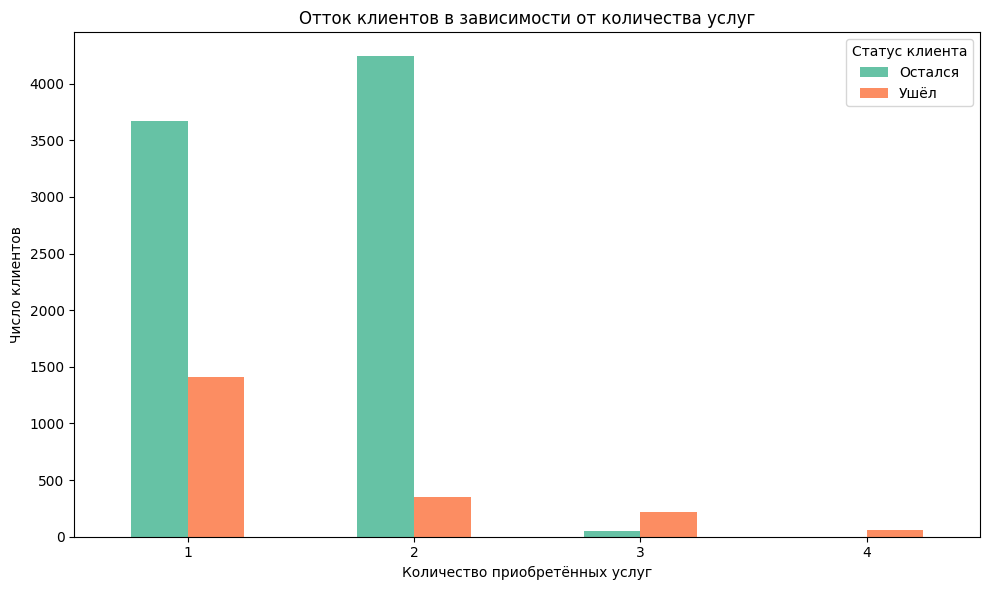

In [62]:
grouped = churn.pivot_table(
    index='NumOfProducts',
    columns='Exited',
    values='CustomerId',  # можно взять любой столбец с непустыми значениями
    aggfunc='count',
    fill_value=0
)

grouped.plot(kind='bar', figsize=(10, 6), color=['#66c2a5', '#fc8d62'])

plt.title('Отток клиентов в зависимости от количества услуг')
plt.xlabel('Количество приобретённых услуг')
plt.ylabel('Число клиентов')
plt.legend(['Остался', 'Ушёл'], title='Статус клиента')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Отток, больше всего кто приобретал 1 или 2 услуги, в 4 категории почти нет клиетов кто остается

## 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

C:\Users\ykarabekov\AppData\Local\Temp\ipykernel_18624\817415613.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




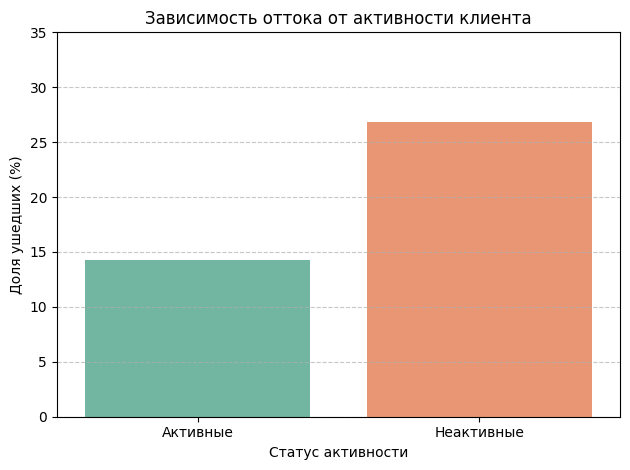

In [65]:
# Группировка: среднее по колонке 'Exited' = доля ушедших
active_churn_rate = churn.groupby('IsActiveMember')['Exited'].mean().reset_index()

# Преобразуем в проценты
active_churn_rate['Exited'] = active_churn_rate['Exited'] * 100

# Подписи
active_churn_rate['IsActiveMember'] = active_churn_rate['IsActiveMember'].map({0: 'Неактивные', 1: 'Активные'})
active_churn_rate.sort_values('IsActiveMember', inplace=True)

# Построение диаграммы
sns.barplot(x='IsActiveMember', y='Exited', data=active_churn_rate, palette='Set2')

plt.title('Зависимость оттока от активности клиента')
plt.ylabel('Доля ушедших (%)')
plt.xlabel('Статус активности')
plt.ylim(0, 35)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Отток больше среди неактивных клиентов (значительно), я бы предложил заманивать клиентов различными плюшками, чтобы стали активными

## 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [66]:
churn_by_country = churn.groupby('Geography')['Exited'].mean().reset_index()
churn_by_country['Exited'] = (churn_by_country['Exited'] * 100)

fig = px.choropleth(
    churn_by_country,
    locations='Geography',
    locationmode='country names',
    color='Exited',
    color_continuous_scale='Reds',
    title='Доля ушедших клиентов по странам (%)',
    labels={'Exited': 'Отток (%)'}
)
fig.show()


Наибольшая доля ушедших клиентов наблюдается в Германии

## 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

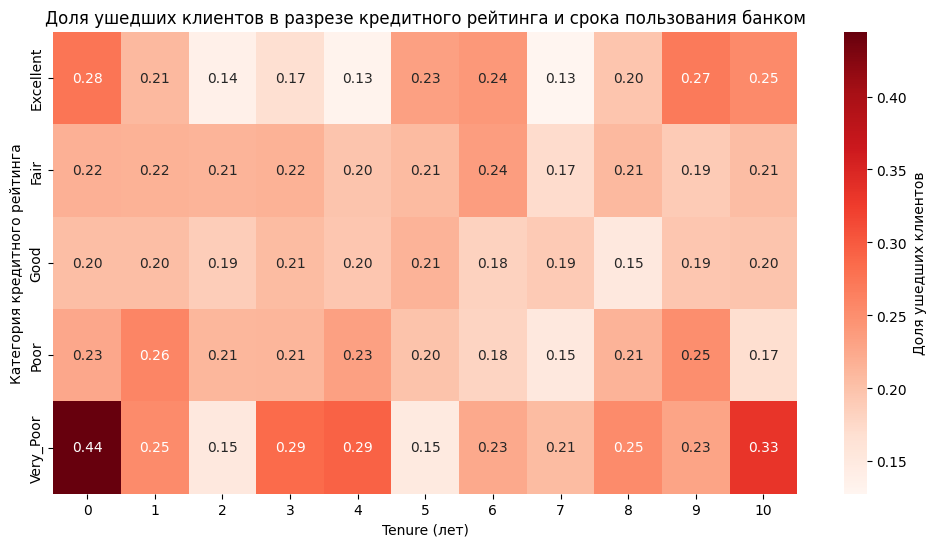

In [69]:
# Функция из условия
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

# Создаём новый столбец с категориями кредитного рейтинга
churn['CreditScoreCat'] = churn['CreditScore'].apply(get_credit_score_cat)

# Создаём сводную таблицу: строки - CreditScoreCat, столбцы - Tenure, значения - среднее Exited
pivot_table = churn.pivot_table(index='CreditScoreCat', 
                             columns='Tenure', 
                             values='Exited', 
                             aggfunc='mean')


# Строим тепловую карту с аннотациями
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='Reds', cbar_kws={'label': 'Доля ушедших клиентов'})
plt.title('Доля ушедших клиентов в разрезе кредитного рейтинга и срока пользования банком')
plt.xlabel('Tenure (лет)')
plt.ylabel('Категория кредитного рейтинга')
plt.show()